In [1]:
#Import modules #Run this once

import numpy as np
import pandas as pd
import os.path
from pylab import *
import glob
import os
import re
from xlwt import Workbook
from scipy.optimize import curve_fit
global pointnumber
from numpy import sqrt, pi, exp, linspace, loadtxt
from lmfit import  Model, Parameter, Parameters
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## rand_on_off_time

In [2]:
def rand_on_off_times(ton=1, toff1=1, toff2=10, multiplier=100, numpoints=1000):
    '''ton, toff1, toff2 are in millisecond
    multiplier: time resolution
    '''
    #on times
    on_rand_exp = np.random.exponential(ton*multiplier,numpoints);
    on_rand_exp = np.round(on_rand_exp);
    #off times
    off_exp1 = np.random.exponential(toff1*multiplier,numpoints);
    off_exp1 = np.round(off_exp1)
    off_exp2 = np.random.exponential(toff2*multiplier,numpoints);
    off_exp2 = np.round(off_exp2);
    off_rand_exp = off_exp2;
    off_rand_biexp = off_exp2 - off_exp1;
    return on_rand_exp, off_rand_exp,off_rand_biexp

In [205]:
on_rand_exp, off_rand_exp,off_rand_biexp = rand_on_off_times(ton=1, toff1=1, toff2=10,
                                                             multiplier=100, numpoints=10000)
# figure(figsize=(10, 8))
# hist(off_rand_biexp - min(off_rand_biexp), bins=100);

## trace_on_off

In [3]:
def trace_on_off(ton=10, toff1=1, toff2=100, multiplier=1000, numpoints=100,
                oncounts=2500, offcounts=200):
    ''''''
    on_rand_exp, off_rand_exp,off_rand_biexp = rand_on_off_times(ton=ton, toff1=toff1, toff2=toff2,
                                                             multiplier=multiplier, numpoints=numpoints)
    intensity = []
    for i in range(len(off_rand_exp)):
        #on-times
        ran_on = randn(on_rand_exp[i])
        intensity_on = oncounts * np.ones(on_rand_exp[i])
        intensity_on = intensity_on + intensity_on *0.025*ran_on
        intensity = np.concatenate((intensity, intensity_on), axis=0)
        #off time
        ran_off = 3 + randn(off_rand_exp[i])
        intensity_off = offcounts * np.ones(off_rand_exp[i])
        intensity_off = intensity_off + intensity_off*0.25*ran_off
        intensity = np.concatenate((intensity, intensity_off), axis=0)
    time = linspace(1, len(intensity), len(intensity))
    return time, intensity

### time trace plot

(0, 2894.6800280557463)

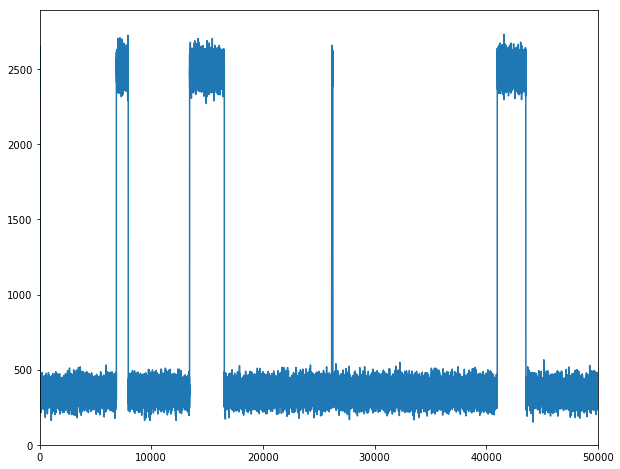

In [6]:
time, intensity = trace_on_off(ton=1, toff1=1, toff2=10, multiplier=1000, numpoints=100)
figure(figsize=(10, 8))
plot(time, intensity)
xlim(0, 50000)
ylim(0, None)

## trace_on_off_blink

In [83]:
def trace_on_off_blink(ton=10, toff1=1, toff2=100, ton_blink=1, toff_blink=0.1, toff_blink2=10,
                       multiplier=1000, numpoints=100,oncounts=2500, offcounts=200):
    ''''''
    on_rand_exp, off_rand_exp,off_rand_biexp = rand_on_off_times(ton=ton, toff1=toff1, toff2=toff2,
                                                             multiplier=multiplier, numpoints=numpoints)
    intensity = []
    for i in range(len(off_rand_exp)):
        #on-times
        ran_on = randn(on_rand_exp[i])
        intensity_on = oncounts * np.ones(on_rand_exp[i])
        
        numofpoints= 10 #len(intensity_on)/()
        on_rand_blink, off_rand_blink, off_rand_blinkbiexp = rand_on_off_times(ton=ton_blink, toff1=toff_blink, toff2=toff_blink2,
                                                                     multiplier=multiplier, numpoints=numofpoints)
        int_blink = []
        for j in range(len(on_rand_blink)):
            int_blink_on = oncounts * np.ones(on_rand_blink[j])#on times
            ran_on_blink = randn(len(int_blink_on))
            int_blink_on = int_blink_on + int_blink_on * ran_on_blink *0.025 #add noise
            int_blink = np.concatenate((int_blink, int_blink_on), axis=0)
            int_blink_off = offcounts * np.ones(off_rand_blink[j]) #off:devide my oncounts to make it 1
            ran_off_blink = 3 + randn(len(int_blink_off))
            int_blink_off = int_blink_off + int_blink_off*ran_off_blink*0.2 # 0.25 is 10 times 0.025
            int_blink = np.concatenate((int_blink, int_blink_off), axis=0)
        if len(intensity_on) < len(int_blink):
            intensity_on[:] = int_blink[:len(intensity_on)]
        else:
            intensity_on[:len(int_blink)] = int_blink[:]
            intensity_on = intensity[:len(int_blink)]
        intensity_on = intensity_on #+ intensity_on *0.025*ran_on
        intensity = np.concatenate((intensity, intensity_on), axis=0)
        #off time
        ran_off = 3 + randn(off_rand_exp[i])
        intensity_off = offcounts * np.ones(off_rand_exp[i])
        intensity_off = intensity_off + intensity_off*0.2*ran_off
        intensity = np.concatenate((intensity, intensity_off), axis=0)
    time = linspace(1, len(intensity), len(intensity))
    return time, intensity

### time trace plot

(0, 2891.5726398628144)

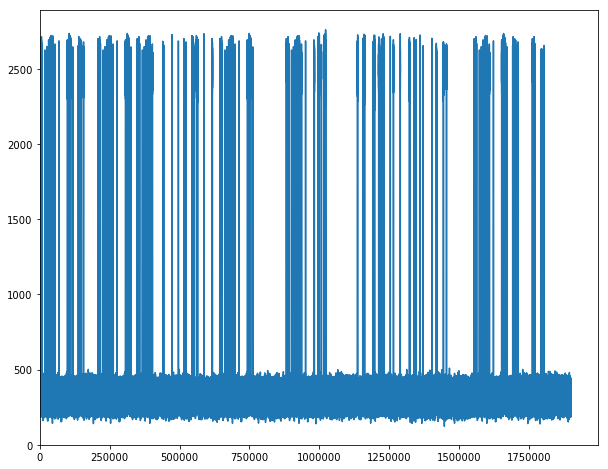

In [92]:
time, intensity = trace_on_off_blink(ton=100, toff1=1, toff2=50, ton_blink=1, toff_blink=0.1, toff_blink2=10,
                       multiplier=1000, numpoints=20,oncounts=2500, offcounts=200)
figure(figsize=(10, 8))
plot(time, intensity)
xlim(0, None)
ylim(0, None)